Iteration 0: Best Value = 1.1391366635475013e+00
Iteration 10: Best Value = 4.3411266790003384e-03
Iteration 20: Best Value = 4.2969669951283021e-06
Iteration 30: Best Value = 8.5196995536521932e-08
Iteration 40: Best Value = 2.9273566038121070e-10
Iteration 50: Best Value = 3.4312801993317112e-12
Iteration 60: Best Value = 3.6618254607715500e-15
Iteration 70: Best Value = 2.2552533551933671e-17
Iteration 80: Best Value = 7.8972840610792971e-19
Iteration 90: Best Value = 2.0588859702587619e-21
Iteration 99: Best Value = 2.7036985502021902e-22

Best Position: [3. 2.]
Best Value: 2.70369855020219e-22


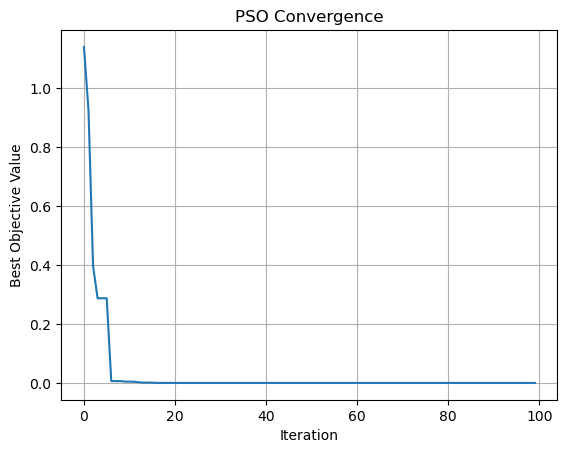

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def objective_function(position):
    x, y = position
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Particle class
class Particle:
    def __init__(self, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1], size=2)
        self.velocity = np.zeros(2)
        self.best_position = np.copy(self.position)
        self.best_value = objective_function(self.position)

    def update_velocity(self, global_best_position, w=0.5, c1=1.5, c2=1.5):
        r1, r2 = np.random.rand(2), np.random.rand(2)
        cognitive = c1 * r1 * (self.best_position - self.position)
        social = c2 * r2 * (global_best_position - self.position)
        self.velocity = w * self.velocity + cognitive + social

    def update_position(self, bounds):
        self.position += self.velocity
        self.position = np.clip(self.position, bounds[0], bounds[1])  # keep inside bounds

        value = objective_function(self.position)
        if value < self.best_value:
            self.best_value = value
            self.best_position = np.copy(self.position)

# PSO algorithm
def pso(objective_function, bounds, num_particles=30, max_iter=100):
    swarm = [Particle(bounds) for _ in range(num_particles)]
    global_best_position = min(swarm, key=lambda p: p.best_value).best_position

    best_scores = []

    for iteration in range(max_iter):
        for particle in swarm:
            particle.update_velocity(global_best_position)
            particle.update_position(bounds)

        current_global_best = min(swarm, key=lambda p: p.best_value)
        global_best_position = current_global_best.best_position
        best_scores.append(current_global_best.best_value)

        if iteration % 10 == 0 or iteration == max_iter - 1:
            print(f"Iteration {iteration}: Best Value = {current_global_best.best_value:.16e}")


    return global_best_position, current_global_best.best_value, best_scores

# Run PSO
bounds = [-5, 5] # Search space bounds for x and y
best_position, best_value, scores = pso(objective_function, bounds)

print(f"\nBest Position: {best_position}")
print(f"Best Value: {best_value}")

# Plot convergence
plt.plot(scores)
plt.title("PSO Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Objective Value")
plt.grid(True)
plt.show()
